<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [28]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [29]:
# Add informative feature names

col_headers = ['patient_age', 'operation_yr', 'nodes_detected', 'survival_status']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=col_headers)

df.head()


,patient_age,operation_yr,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
# Validate appropriate number of observations 
# Number of Instances = 306, UCI ML Repo

df.count()

patient_age        306
operation_yr       306
nodes_detected     306
survival_status    306
dtype: int64

In [31]:
# Check for missing values

df.isna().sum()

patient_age        0
operation_yr       0
nodes_detected     0
survival_status    0
dtype: int64

In [32]:
# Verify survival variable count, 1 = survived 5+ yrs, 2 = did not

df.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [33]:
# Update survival variable, 1 = survived, 0 = did not

df['survival_status'] = df['survival_status'].apply(lambda x: 1 if x==1 else 0)

df.survival_status.value_counts()

1    225
0     81
Name: survival_status, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [34]:
df.describe()

,patient_age,operation_yr,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [35]:
# Need to run this to allow crosstabulation with binned features


!pip install pandas==0.23.4

In [36]:
node_bins = pd.cut(df.nodes_detected, 5)

pd.crosstab(df['survival_status'], node_bins)

nodes_detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survival_status,,,,,
0,58,15,6,1,1
1,208,11,5,0,1


In [43]:
age_bins = pd.cut(df.patient_age, 5)

pd.crosstab(node_bins, [df['survival_status'], age_bins])

survival_status              0     ...                 1
patient_age     (29.947, 40.6]     ...      (72.4, 83.0]
nodes_detected                     ...                  
(-0.052, 10.4]               3     ...                 6
(10.4, 20.8]                 0     ...                 0
(20.8, 31.2]                 1     ...                 0
(31.2, 41.6]                 0     ...                 0
(41.6, 52.0]                 0     ...                 0

[5 rows x 10 columns]

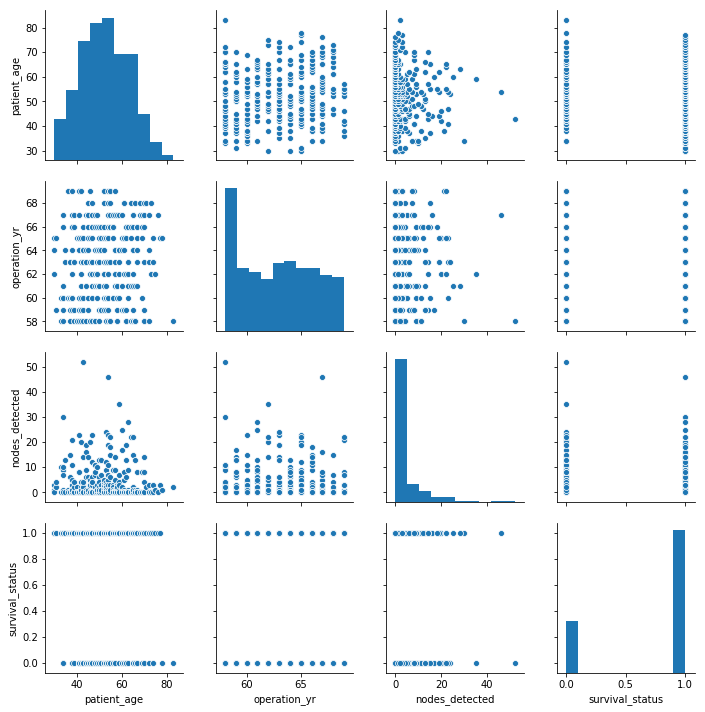

In [38]:
import seaborn as sns

sns.pairplot(df)

Text(0.5, 1.0, 'Survival by Breast Cancer Nodes Detected, Haberman et al.')

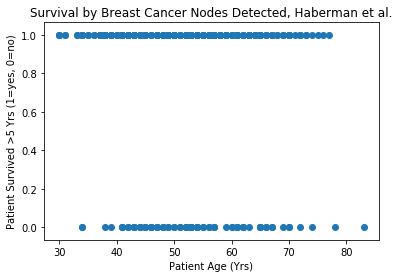

In [52]:
plt.scatter(df.patient_age, df.survival_status)
plt.xlabel('Patient Age (Yrs)')
plt.ylabel('Patient Survived >5 Yrs (1=yes, 0=no)')
plt.title('Survival by Breast Cancer Nodes Detected, Haberman et al.')

Text(0.5, 1.0, 'Survival by Breast Cancer Nodes Detected, Haberman et al.')

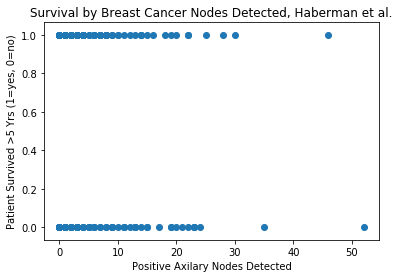

In [48]:
plt.scatter(df.nodes_detected, df.survival_status)
plt.xlabel('Positive Axilary Nodes Detected')
plt.ylabel('Patient Survived >5 Yrs (1=yes, 0=no)')
plt.title('Survival by Breast Cancer Nodes Detected, Haberman et al.')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

> A: Nodes detected

- What is at least one feature that looks to have a negative relationship with survival?

> A:  Patient age

- How are those two features related with each other, and what might that mean?

> A: No clear relation is present, not sure yet what that might mean. I feel like I'm struggling to answer these questions properly. Not sure what I'm missing. I didn't investigate the year of operation, which might be a confounding variable.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

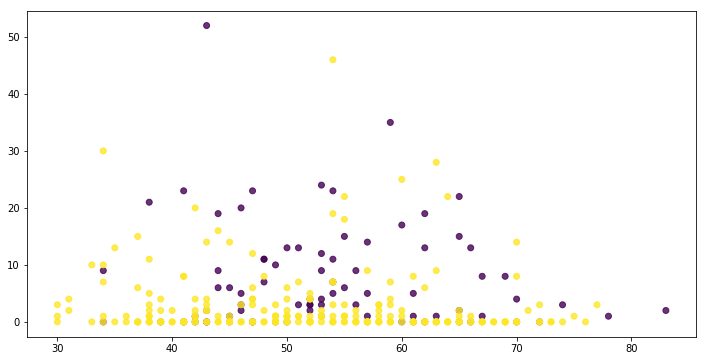

In [147]:
plt.scatter(df.patient_age, df.nodes_detected, alpha=0.8, c=df.survival_status, cmap='viridis', )
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

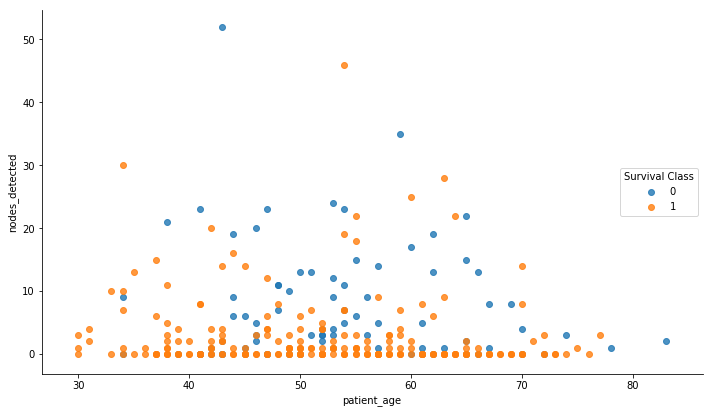

In [151]:
sns.lmplot('patient_age', 'nodes_detected', df, hue='survival_status', fit_reg=False, legend=False)
fig = plt.gcf()
fig.set_size_inches(11, 6)
plt.legend(loc=7, title='Survival Class')
plt.show()